In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

In [2]:
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns = housing.feature_names)

In [3]:
data['Price'] = housing.target

In [4]:
print("First 5 rows : \n")
data.head()

First 5 rows : 



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
print("Checking for null values : ")
data.isnull().sum()

Checking for null values : 


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

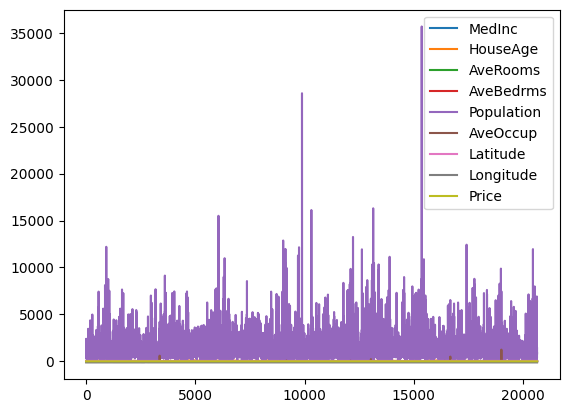

In [6]:
data.plot()
plt.show()

In [7]:
print("Covariance Matrix : ")
data.cov()

Covariance Matrix : 


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,3.609323,-2.846140,1.536568,-0.055858,1.040098e+01,0.370289,-0.323860,-0.057765,1.508475
HouseAge,-2.846140,158.396260,-4.772882,-0.463718,-4.222271e+03,1.724298,0.300346,-2.728244,1.533988
AveRooms,1.536568,-4.772882,6.121533,0.993868,-2.023337e+02,-0.124689,0.562235,-0.136518,0.433826
AveBedrms,-0.055858,-0.463718,0.993868,0.224592,-3.552723e+01,-0.030424,0.070575,0.012670,-0.025539
Population,10.400979,-4222.270582,-202.333712,-35.527225,1.282470e+06,821.712002,-263.137814,226.377839,-32.212487
AveOccup,0.370289,1.724298,-0.124689,-0.030424,8.217120e+02,107.870026,0.052492,0.051519,-0.284494
Latitude,-0.323860,0.300346,0.562235,0.070575,-2.631378e+02,0.052492,4.562293,-3.957054,-0.355326
Longitude,-0.057765,-2.728244,-0.136518,0.012670,2.263778e+02,0.051519,-3.957054,4.014139,-0.106274
Price,1.508475,1.533988,0.433826,-0.025539,-3.221249e+01,-0.284494,-0.355326,-0.106274,1.331615


In [8]:
print("Correlation Matrix : ")
data.corr()

Correlation Matrix : 


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [9]:
x = data.drop('Price', axis = 1)
y = data['Price']
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [10]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [11]:
ypred = model.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print(f'\n Mean Squared Error : {mse}')
r2 = r2_score(ytest, ypred)
print(f'\n R2 Score : {r2}')


 Mean Squared Error : 0.5411287478470689

 R2 Score : 0.5910509795491351


In [12]:
a = 1-(mse/np.var(ytest))
a

0.5910509795491352